# CODE TO BUILD A SIMPLE PERCEPTRON 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# example making new class predictions for a classification problem
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


speed_data = pd.read_csv("speed_decision_data.csv")

In [3]:
speed_data.head()

,1 - Distance From Bump,Height of Bump,Speed
0,0.575374,0.680337,0
1,0.376002,0.278661,1
2,0.973890,0.741585,0
3,0.310378,0.342374,1
4,0.109521,0.268304,1


<Axes: xlabel='1 - Distance From Bump', ylabel='Height of Bump'>

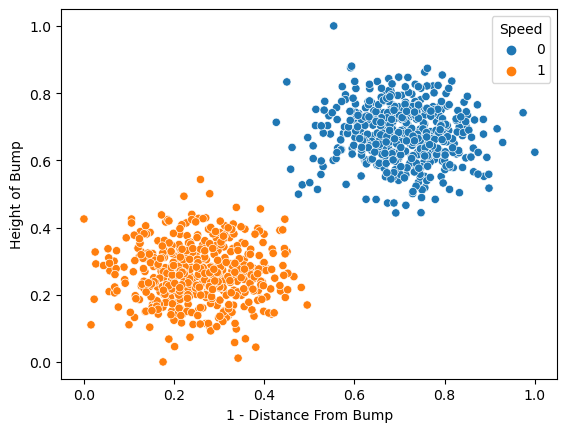

In [4]:
sns.scatterplot(x=speed_data['1 - Distance From Bump'], y=speed_data['Height of Bump'], hue = speed_data['Speed'])

In [5]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]

In [6]:
y_train = speed_data['Speed']

In [7]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100, verbose=2)



H:\anaconda3-fresh\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 - 2s - 76ms/step - loss: 0.9157
Epoch 2/100
32/32 - 0s - 6ms/step - loss: 0.8999
Epoch 3/100
32/32 - 0s - 5ms/step - loss: 0.8852
Epoch 4/100
32/32 - 0s - 5ms/step - loss: 0.8710
Epoch 5/100
32/32 - 0s - 4ms/step - loss: 0.8579
Epoch 6/100
32/32 - 0s - 5ms/step - loss: 0.8453
Epoch 7/100
32/32 - 0s - 10ms/step - loss: 0.8343
Epoch 8/100
32/32 - 0s - 4ms/step - loss: 0.8234
Epoch 9/100
32/32 - 0s - 5ms/step - loss: 0.8139
Epoch 10/100
32/32 - 0s - 6ms/step - loss: 0.8052
Epoch 11/100
32/32 - 0s - 11ms/step - loss: 0.7968
Epoch 12/100
32/32 - 0s - 6ms/step - loss: 0.7892
Epoch 13/100
32/32 - 0s - 11ms/step - loss: 0.7821
Epoch 14/100
32/32 - 0s - 6ms/step - loss: 0.7755
Epoch 15/100
32/32 - 0s - 6ms/step - loss: 0.7691
Epoch 16/100
32/32 - 0s - 8ms/step - loss: 0.7632
Epoch 17/100
32/32 - 0s - 7ms/step - loss: 0.7576
Epoch 18/100
32/32 - 0s - 5ms/step - loss: 0.7520
Epoch 19/100
32/32 - 0s - 9ms/step - loss: 0.7468
Epoch 20/100
32/32 - 0s - 6ms/step - loss: 0.7417
Epoch

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [9]:
# make a prediction
# Pre-Tensorflow 2.6 code:
#y_train_predict = model.predict_classes(X_train) 

# The new way to do it for binary classification, now that predict_classes is gone:
y_train_predict = (model.predict(X_train) > 0.5).astype("int32")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<Axes: >

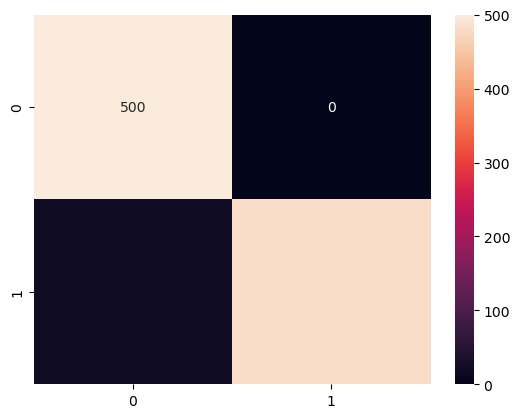

In [10]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


C:\Users\Frank\AppData\Local\Temp\ipykernel_14364\2355699475.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


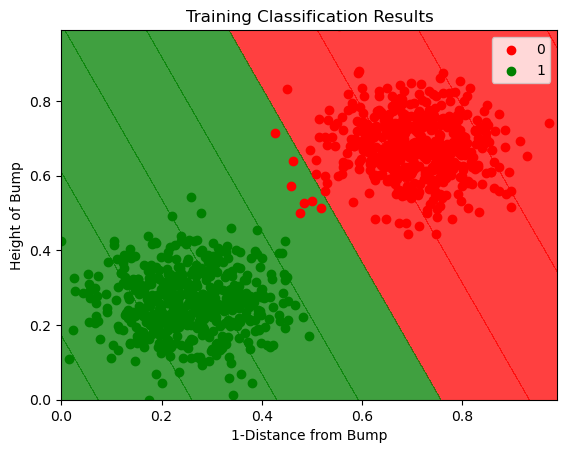

In [11]:
# https://medium.com/coinmonks/predicting-product-sales-through-ads-delivered-on-social-networking-sites-using-k-n-n-in-python-b9f955d184af


# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train.values, y_train.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j)
    
plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

In [12]:
weights, biases = model.layers[0].get_weights()

In [13]:
weights

array([[-1.9736711],
       [-0.8433562]], dtype=float32)

In [14]:
biases

array([1.0892676], dtype=float32)